Universidad del valle de Guatemala <br>
Facultad de Ingeniería <br>
Departamento de ciencias de la Computación <br>
Inteligencia Artificial <br>

Grupo # 5
Christopher García 20541 <br>

# Laboratorio 6: Árboles de decisión
Instrucciones: Deberá construir dos modelos para dos datasets distintos. El primero es un problema de clasificación en el cual usará un set de datos del juego League of Legends y deberá usar como su variable objetivo si el equipo azul gana. Para la segunda parte, usará un dataset del videojuego FIFA 2018, donde deberá asumir que existe una relación con las variables numéricas y categóricas del dataset con el potencial del jugador (variable objetivo).

### Task 1.1 - Clasificación de Partidas de League of Legends

In [247]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from pandas_profiling import ProfileReport
from quickda.clean_data import *
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Leer archivo csv
df = pd.read_csv('./Datasets/high_diamond_ranked_10min.csv')

In [ ]:
# Análisis general que permite determinar con mayor facilidad que datos están desbalanceados
profile = ProfileReport(df)
profile

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

### Análisis exploratorio y gráficos

<AxesSubplot: >

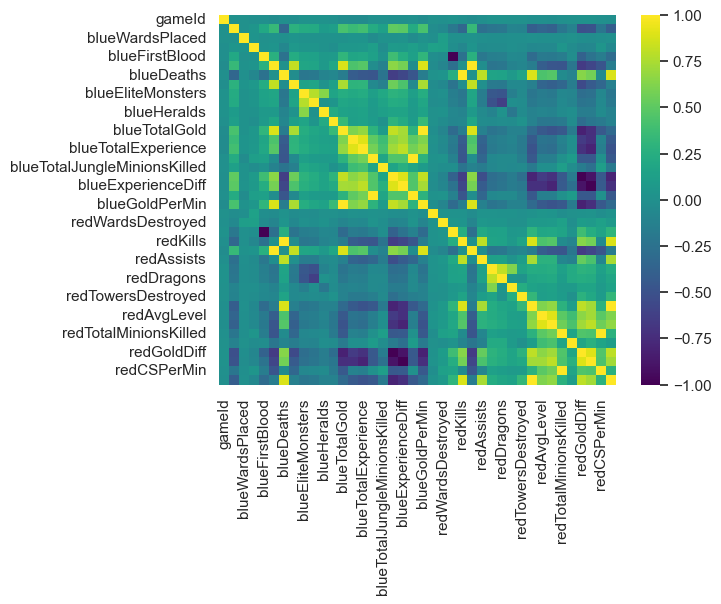

In [18]:
# Gráfico de correlación entre los datos
sns.heatmap(df.corr(),cmap = 'viridis')

<AxesSubplot: >

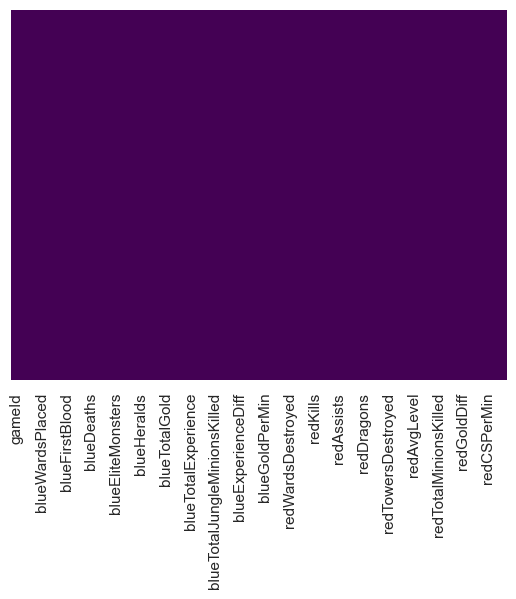

In [19]:
# Gráfico para ver si existen datos faltantes
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

Text(0, 0.5, 'Cantidad')

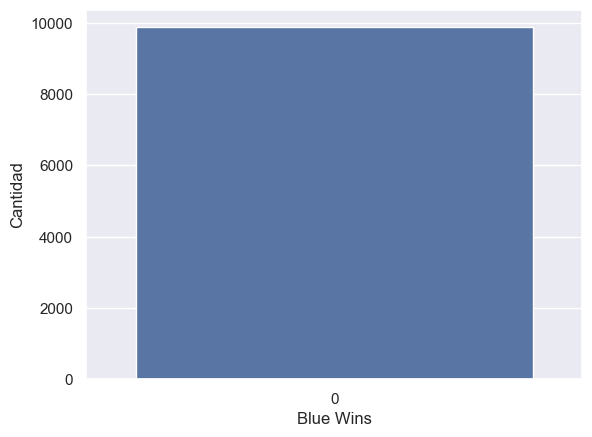

In [226]:
ax = sns.countplot(df['blueWins'], label = "Conteo") 
ax.set_xlabel("Blue Wins", size=12)
ax.set_ylabel("Cantidad", size=12)

Text(0, 0.5, 'Cantidad')

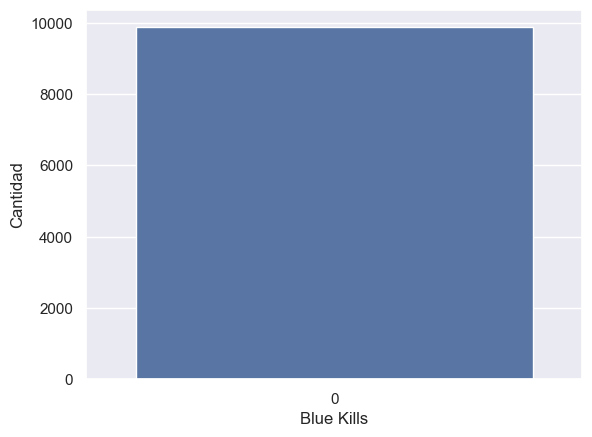

In [225]:
ax = sns.countplot(df['blueKills'], label = "Conteo") 
ax.set_xlabel("Blue Kills", size=12)
ax.set_ylabel("Cantidad", size=12)

Outlier Analysis - Boxplot


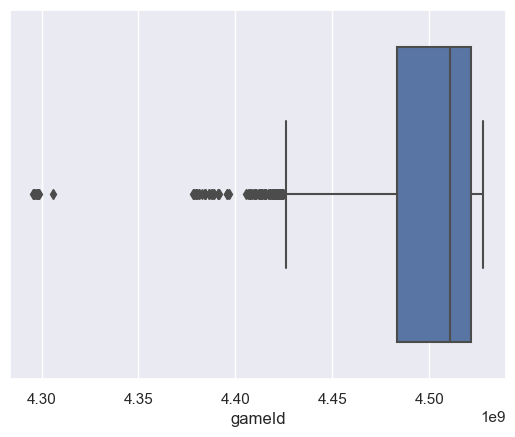

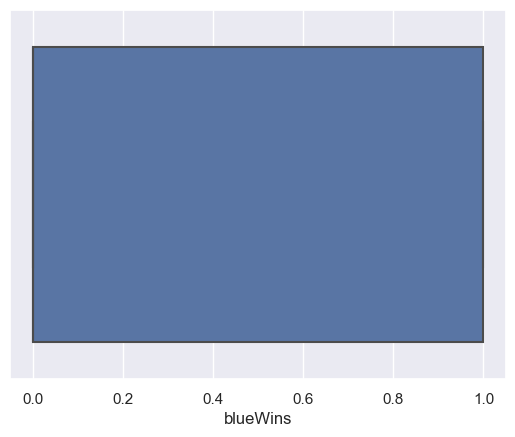

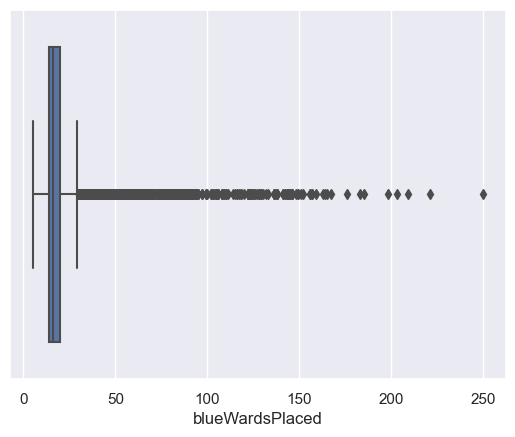

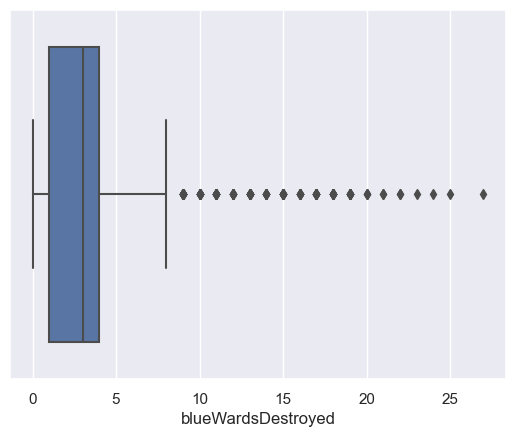

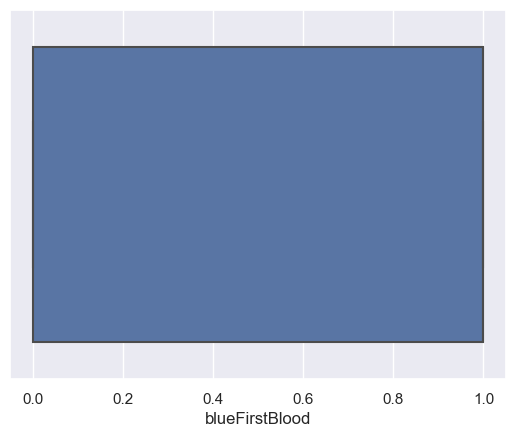

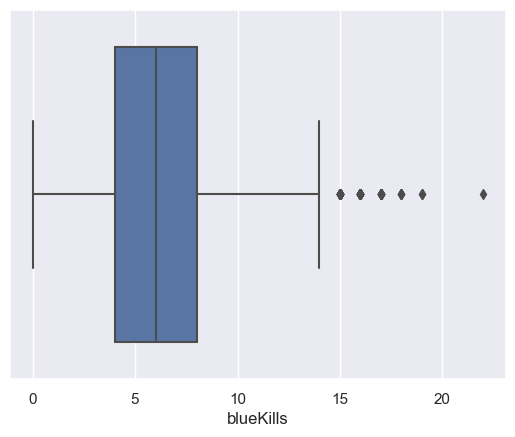

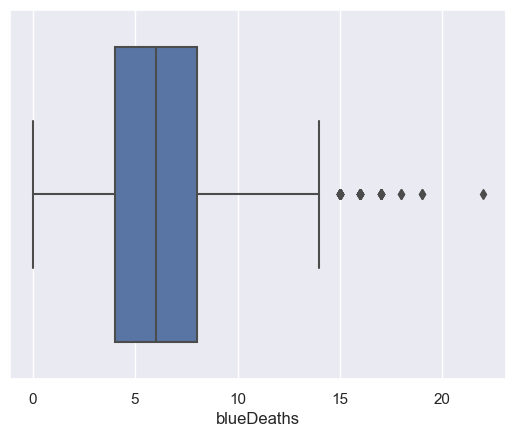

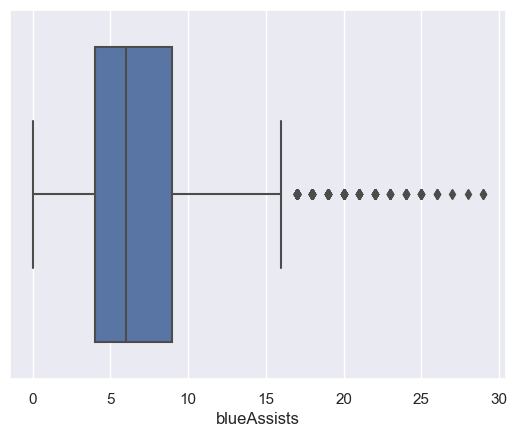

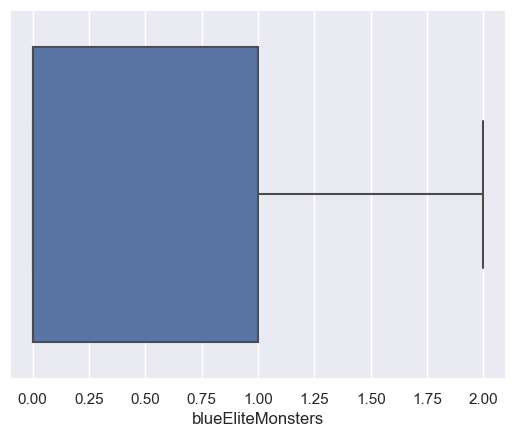

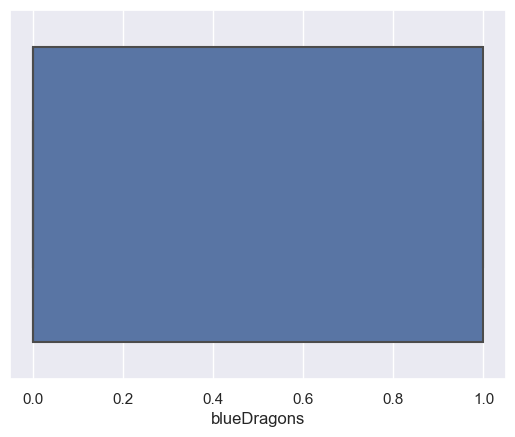

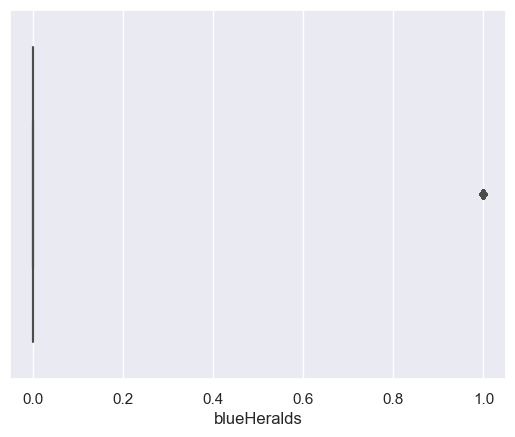

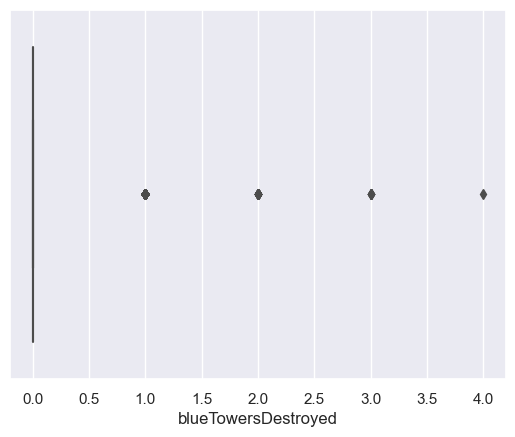

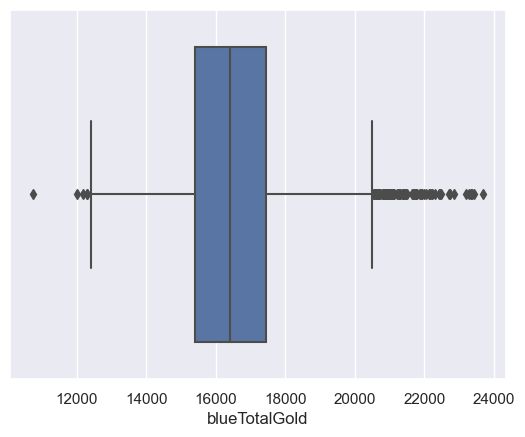

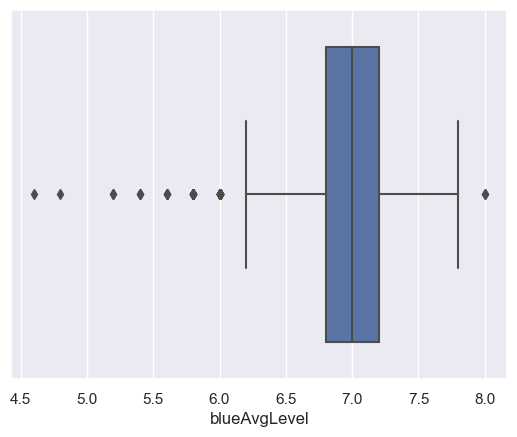

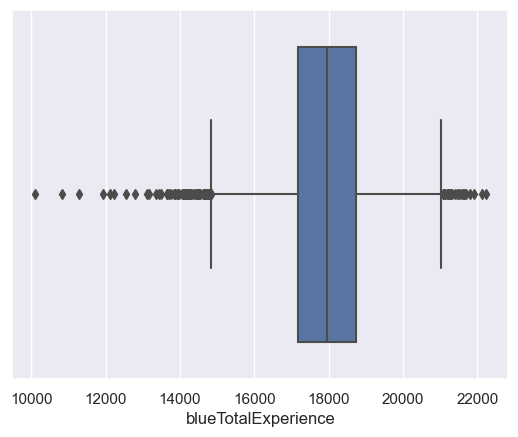

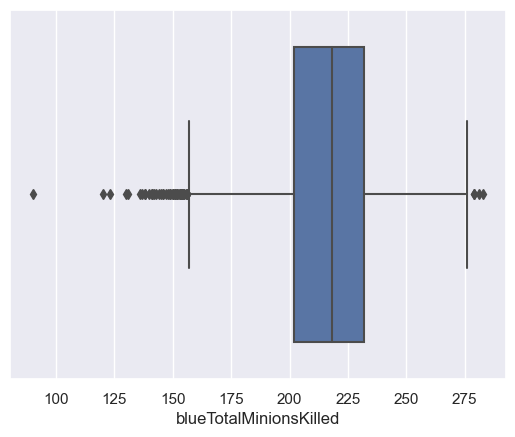

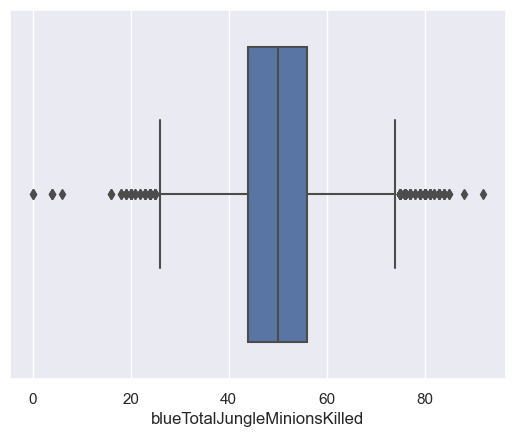

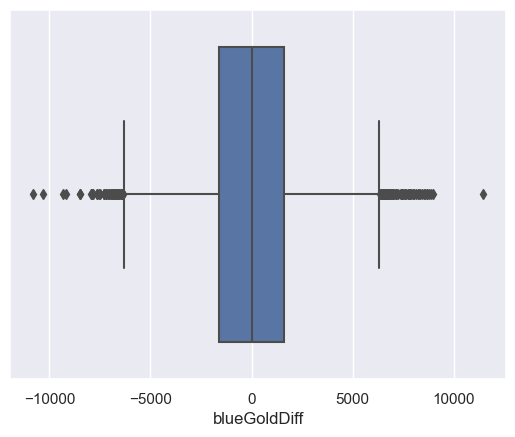

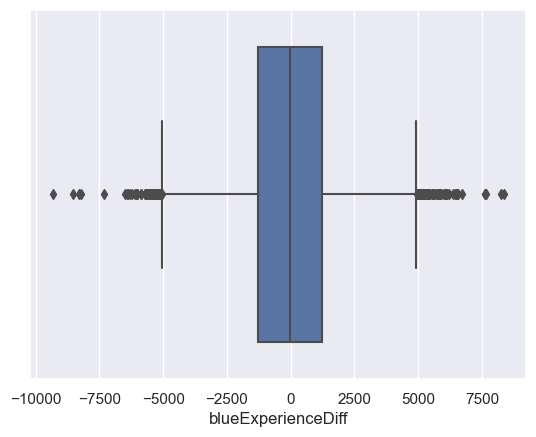

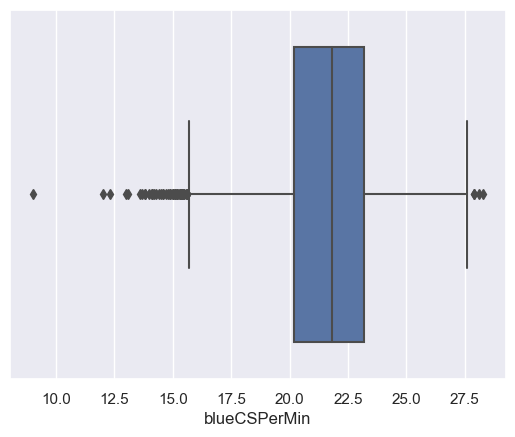

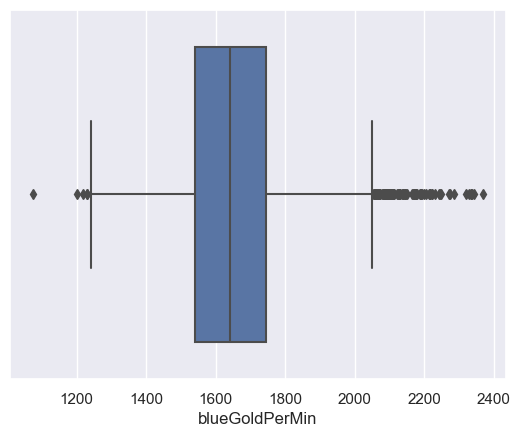

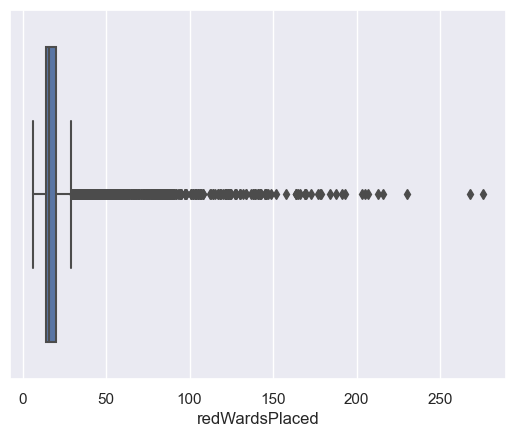

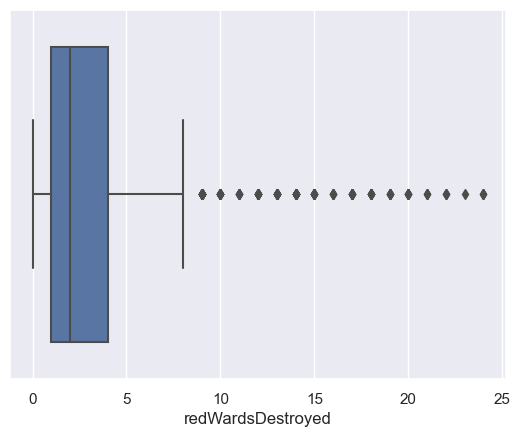

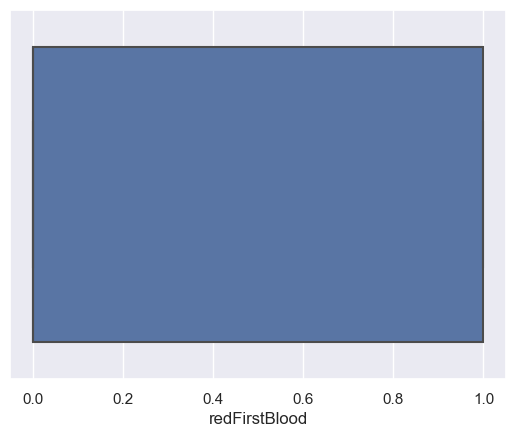

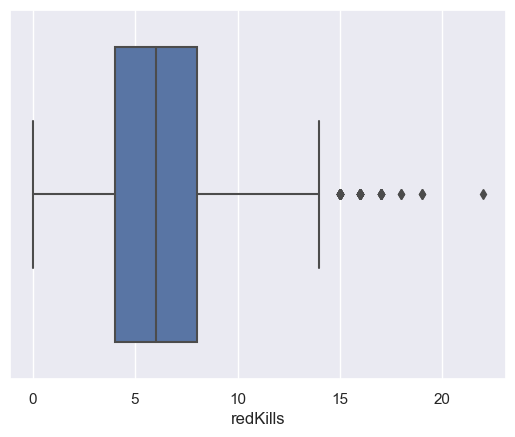

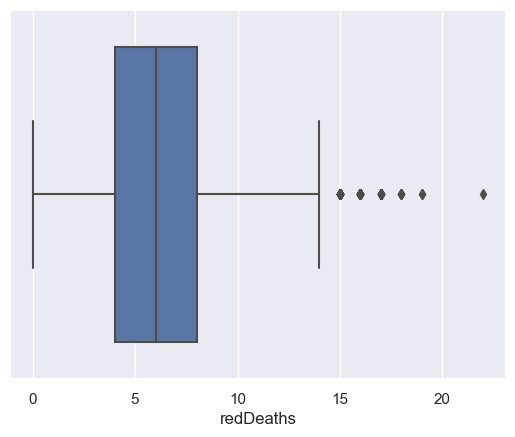

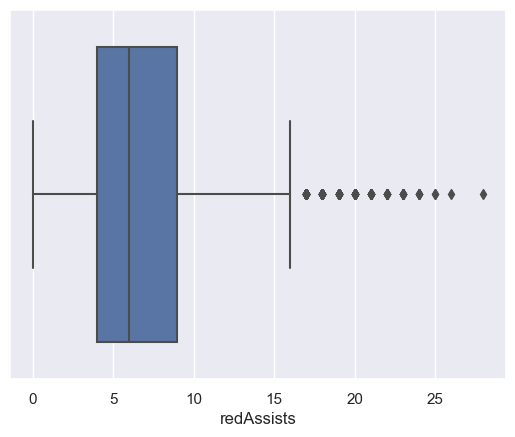

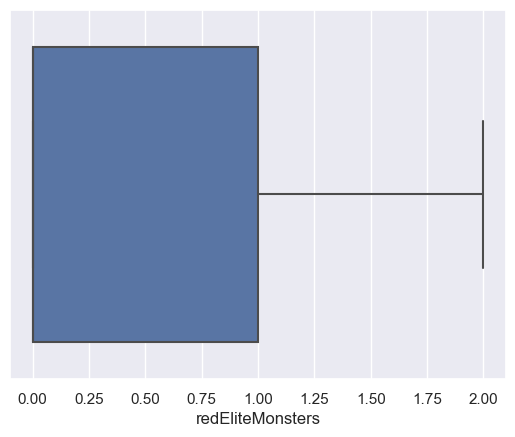

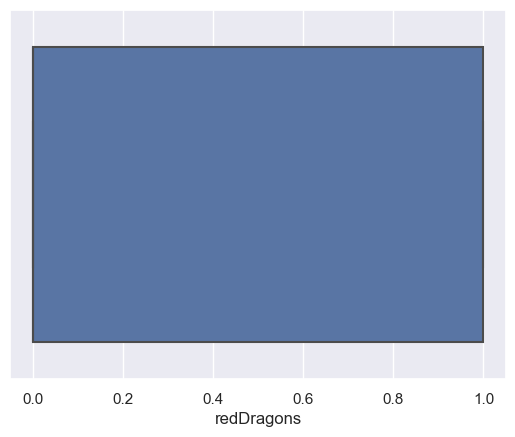

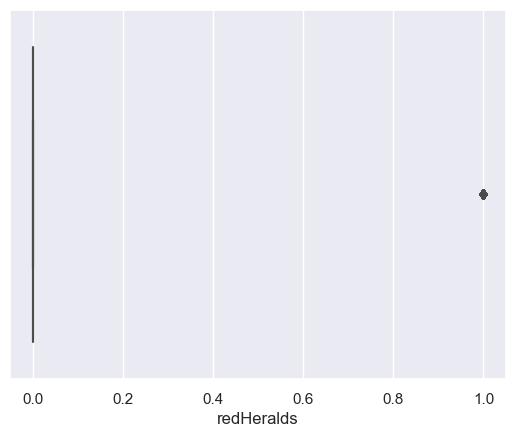

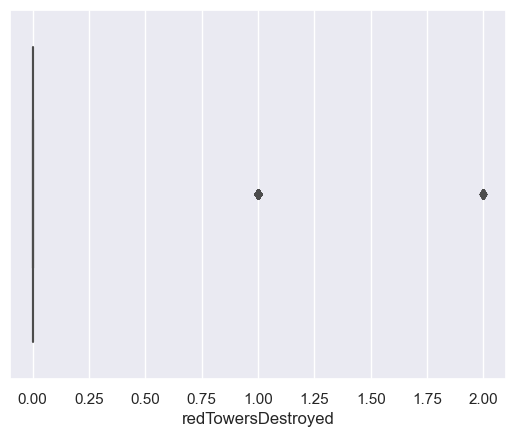

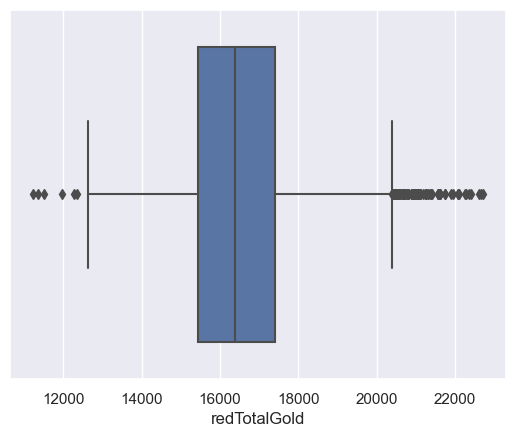

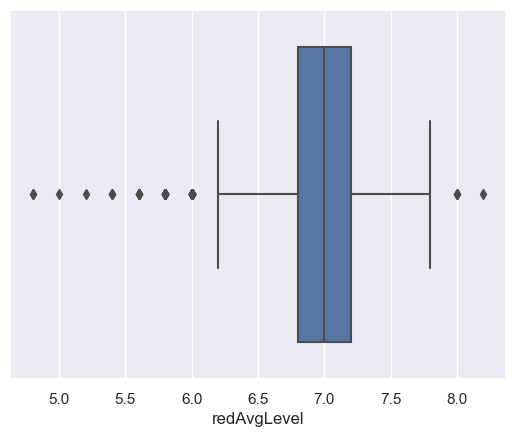

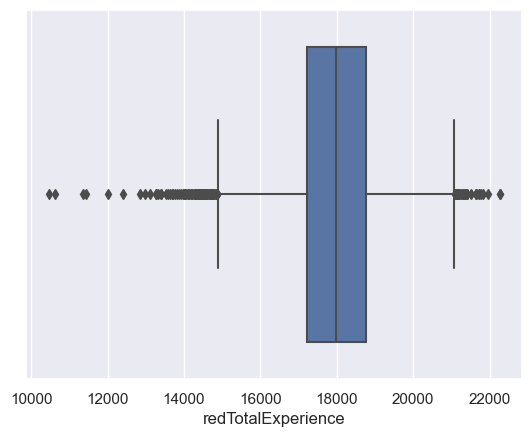

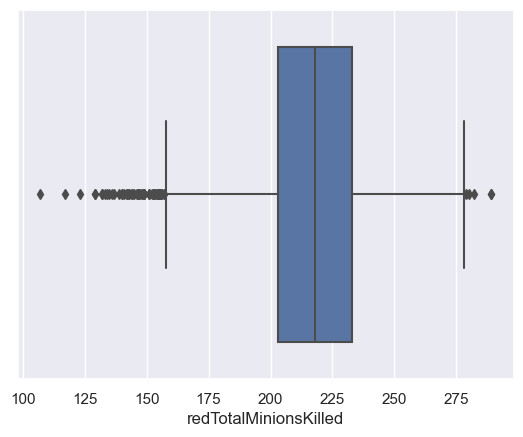

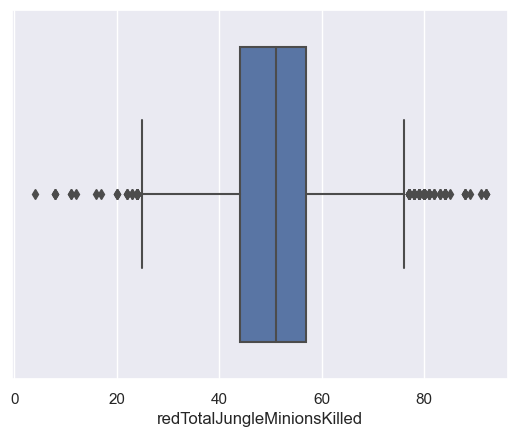

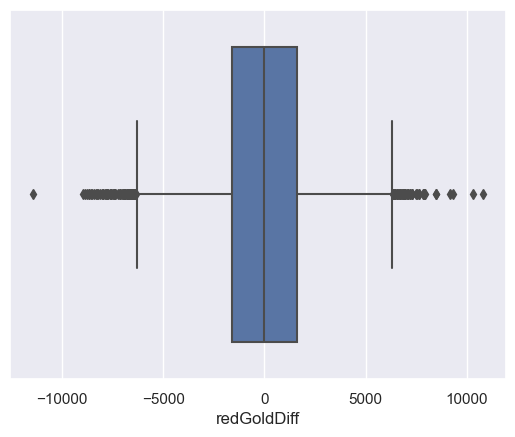

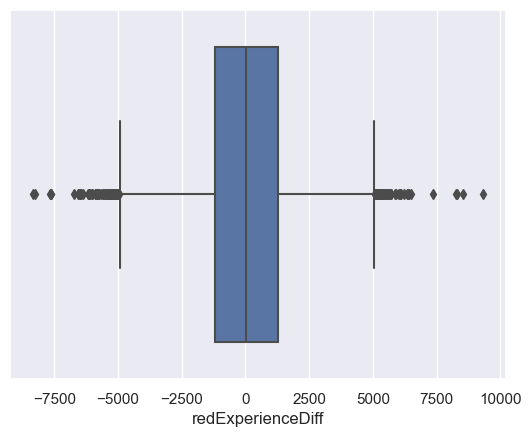

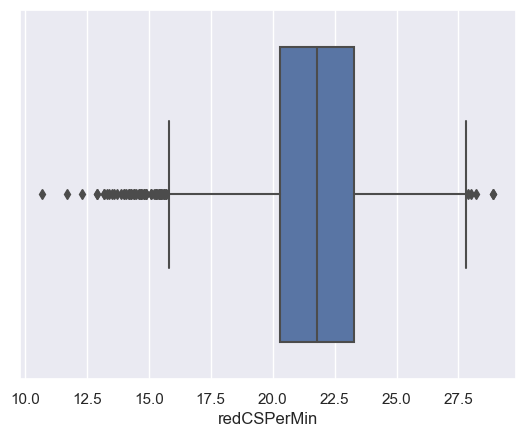

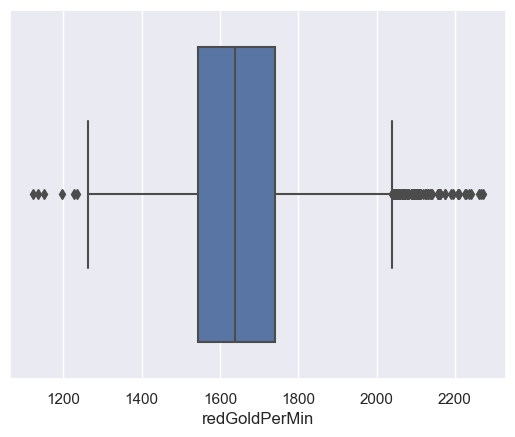

Distribution Analysis - Histogram


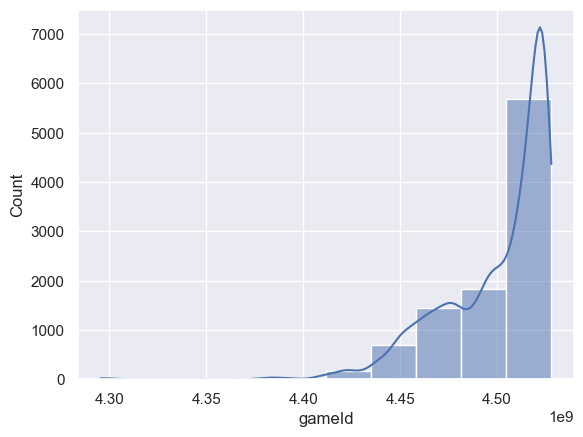

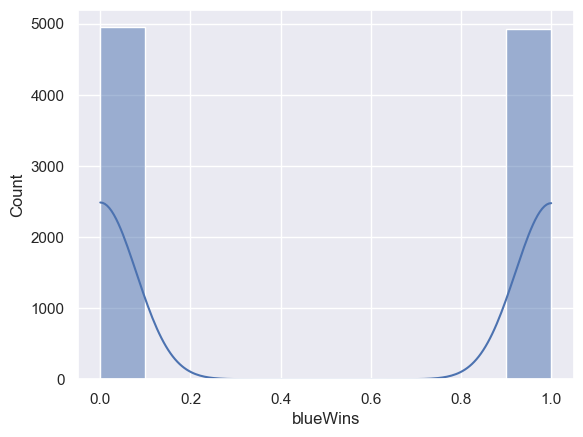

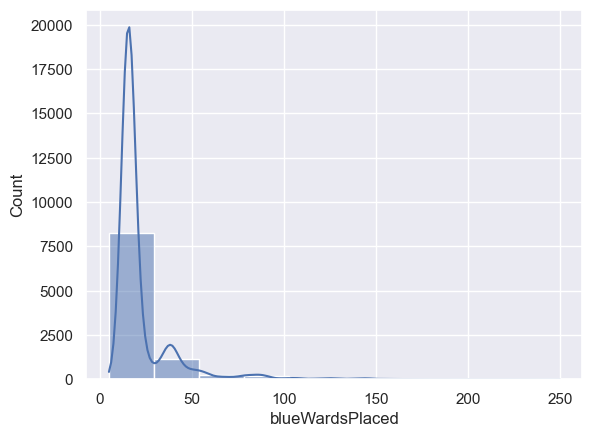

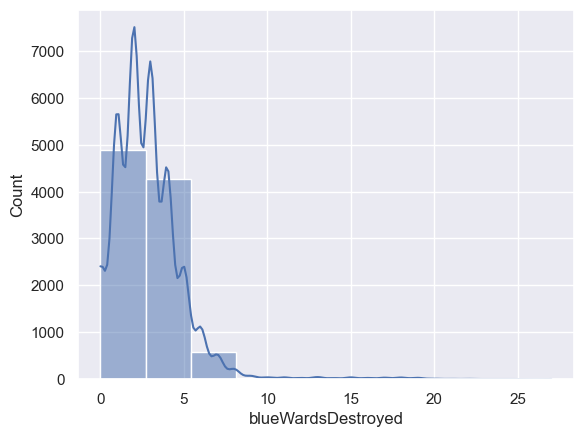

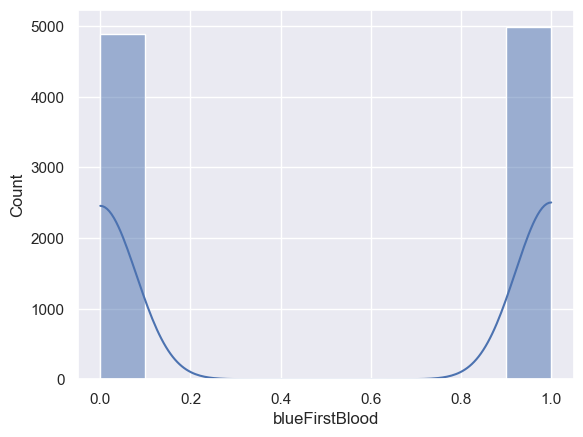

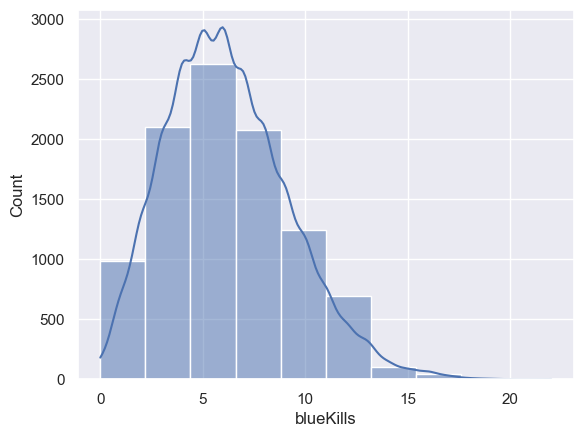

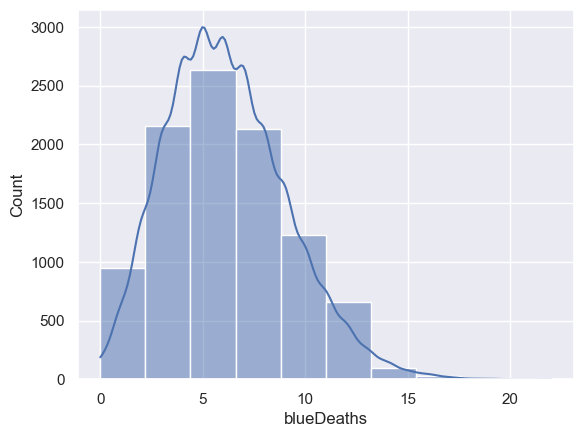

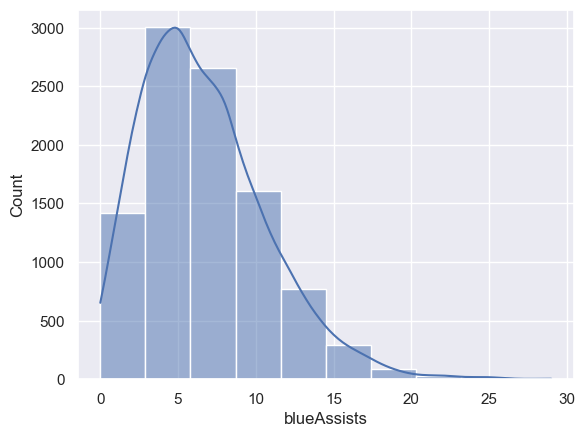

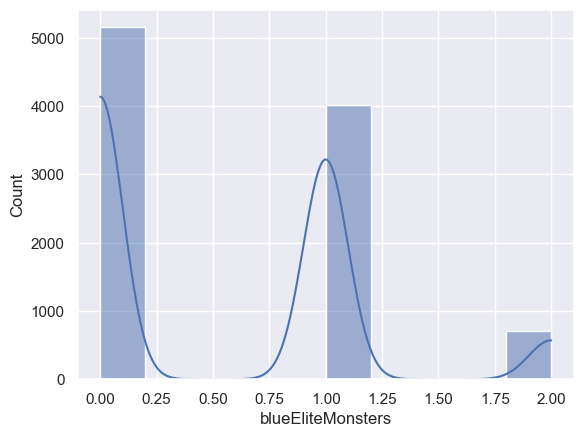

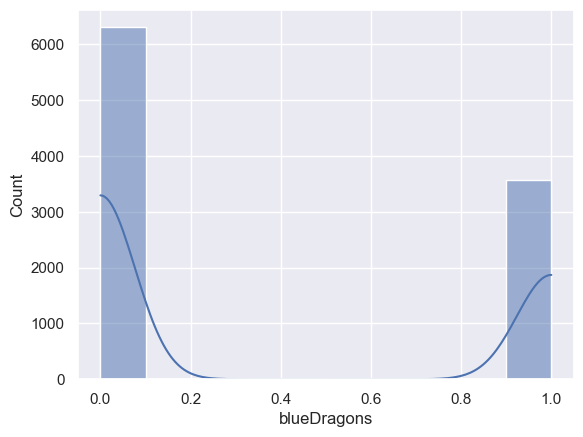

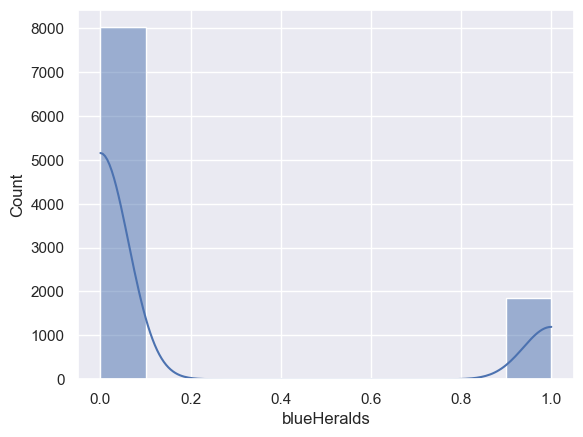

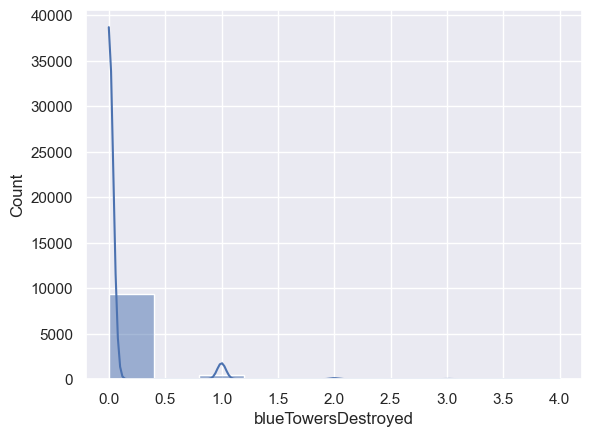

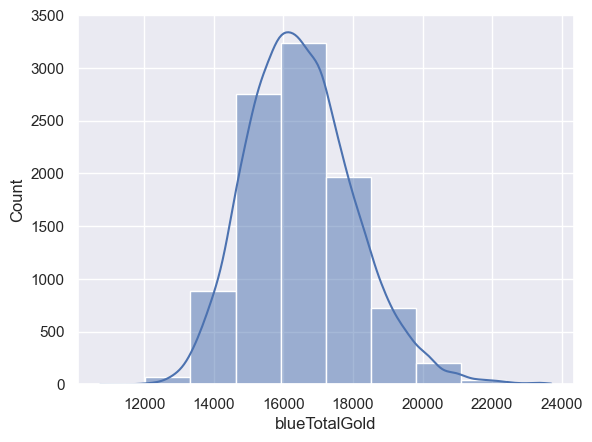

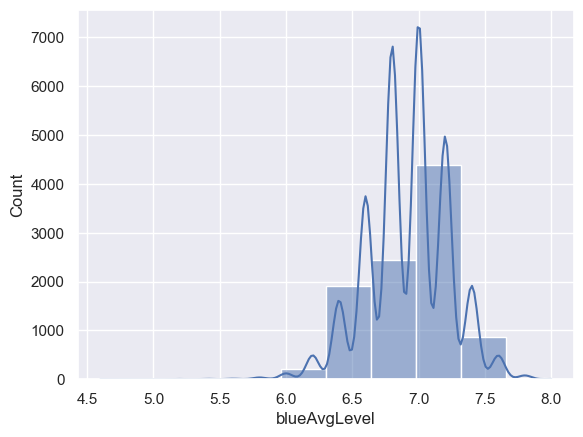

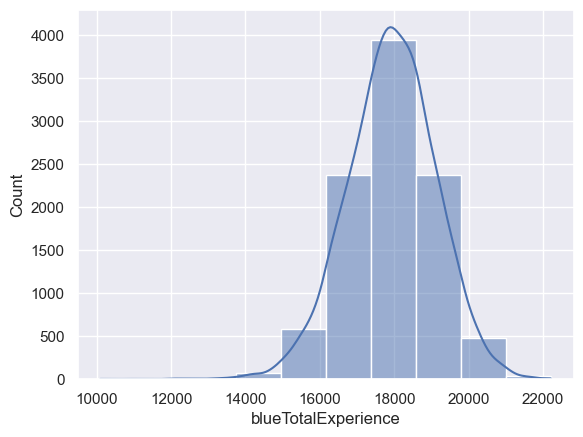

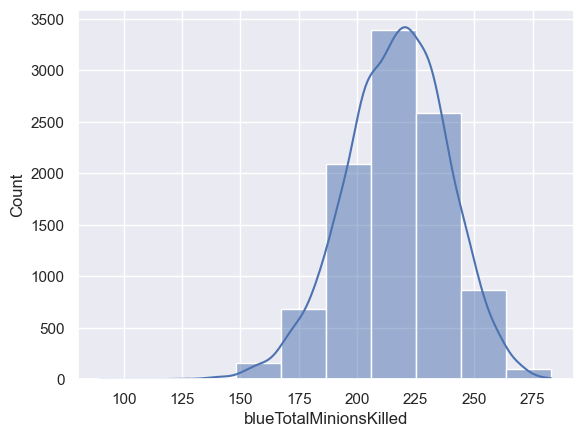

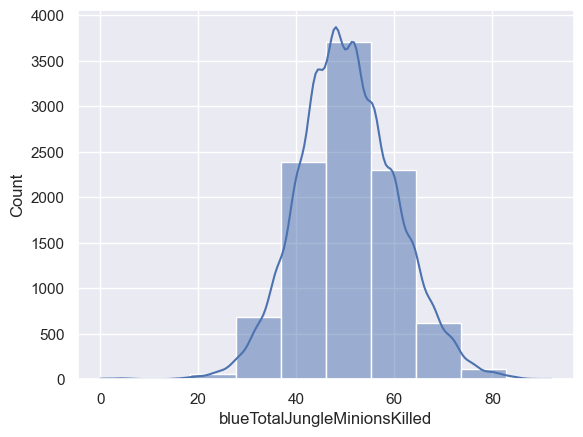

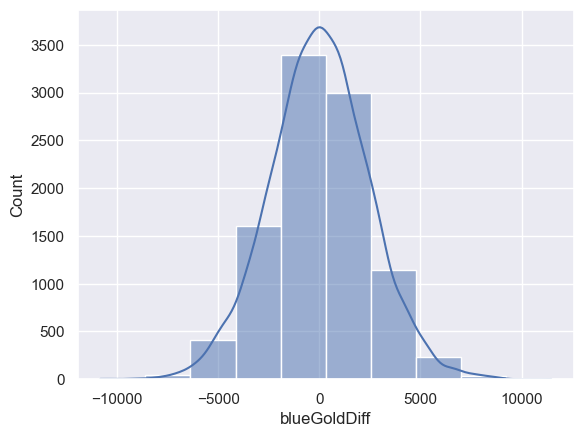

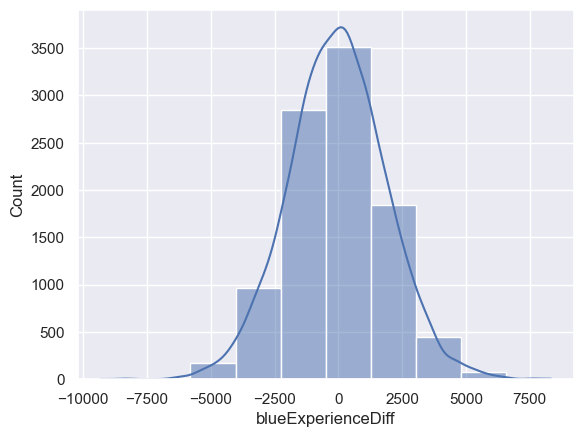

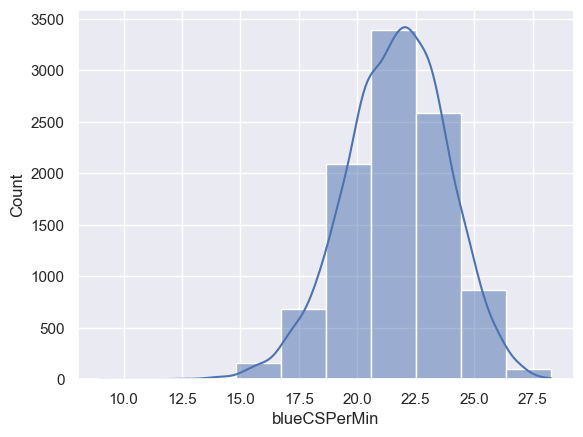

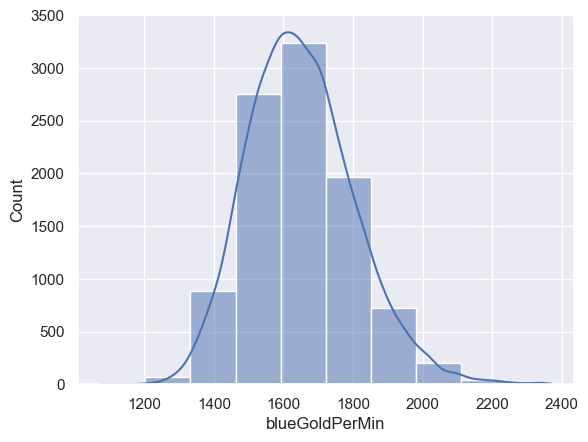

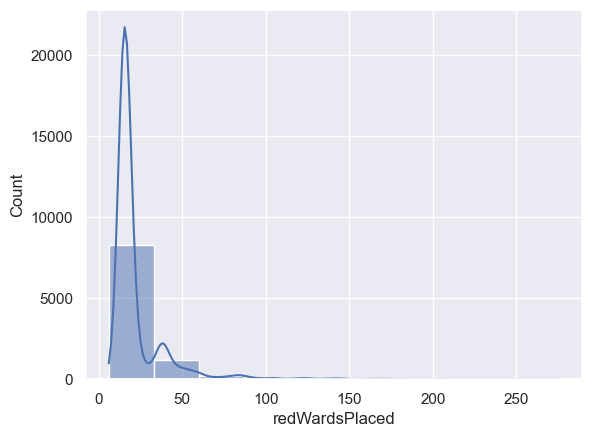

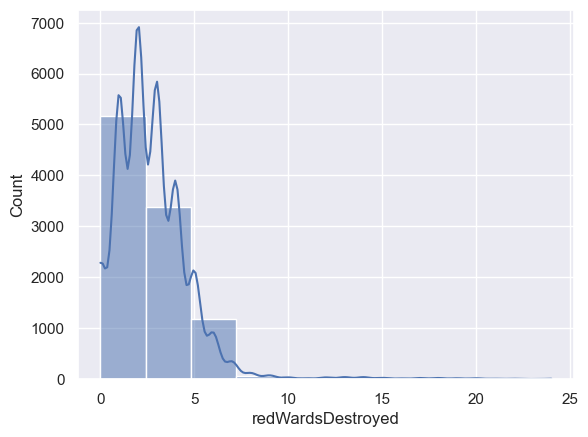

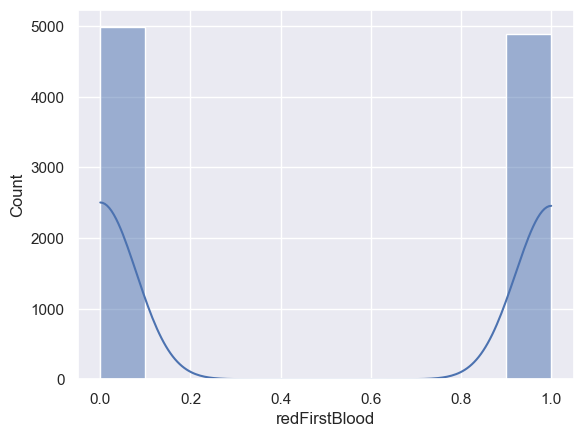

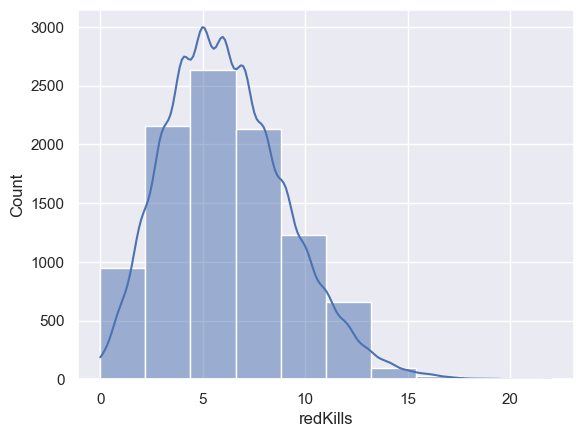

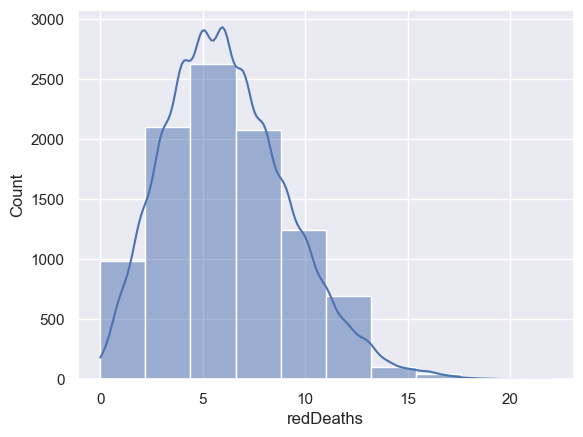

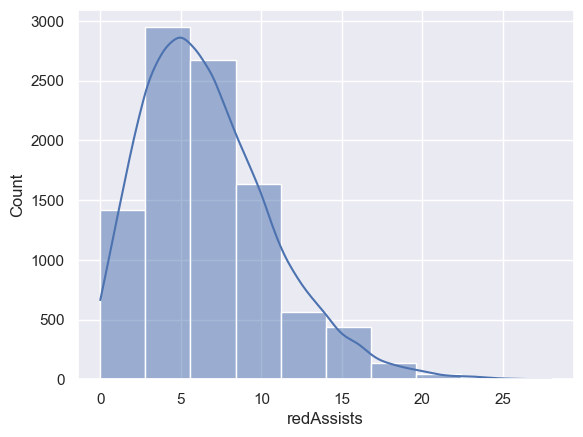

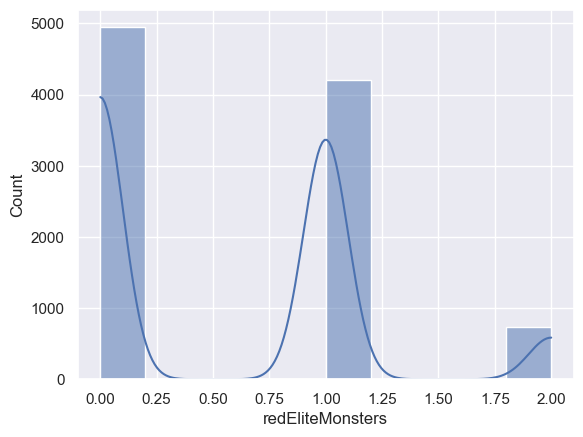

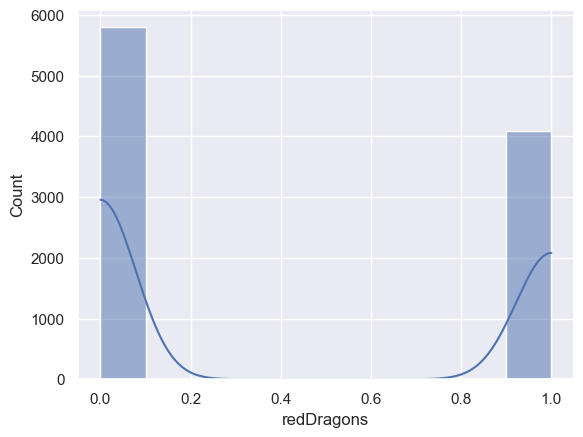

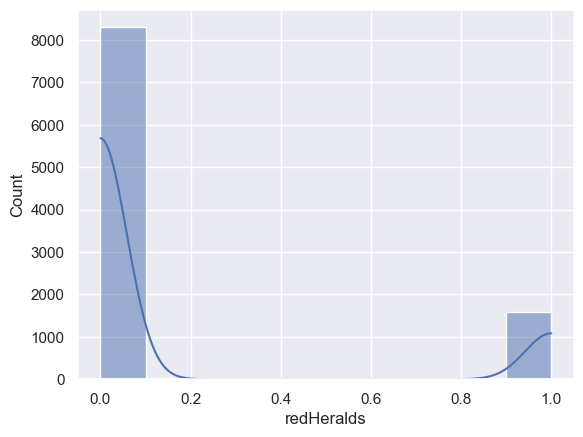

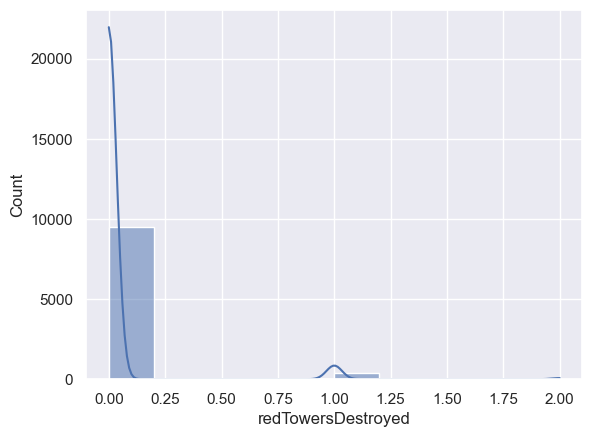

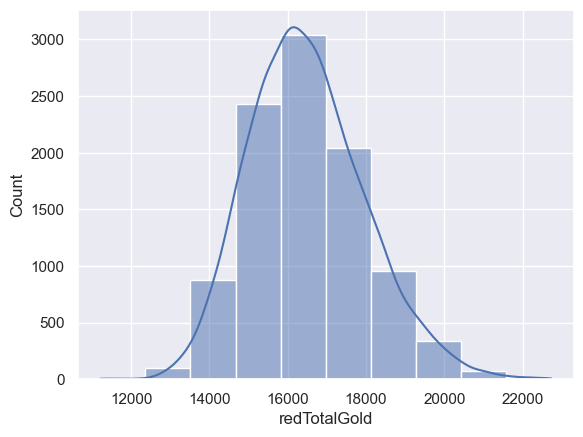

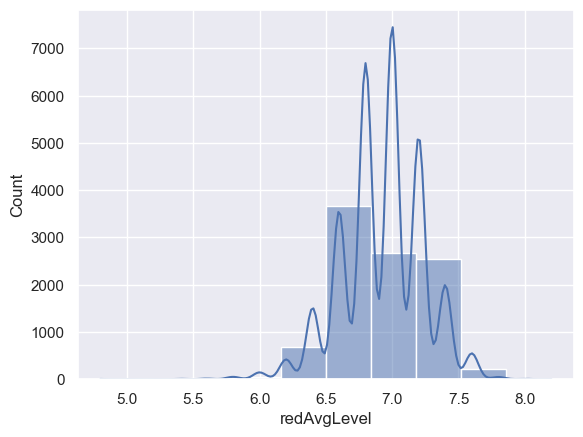

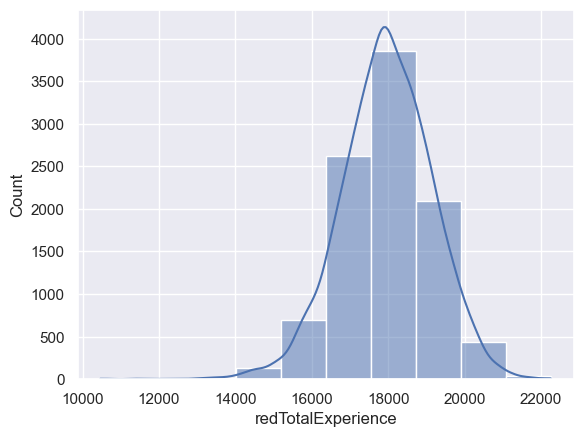

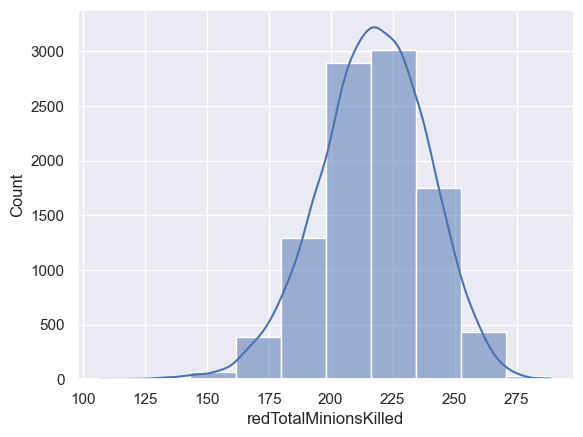

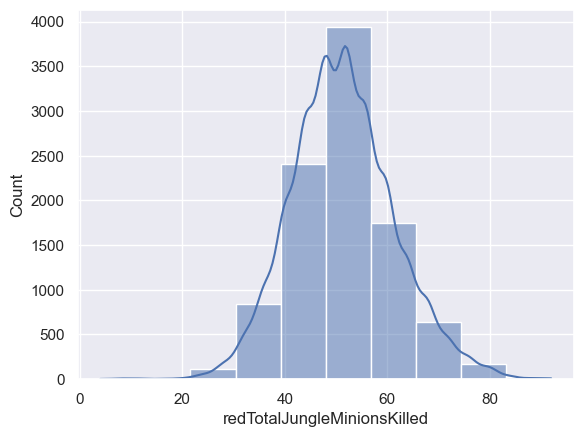

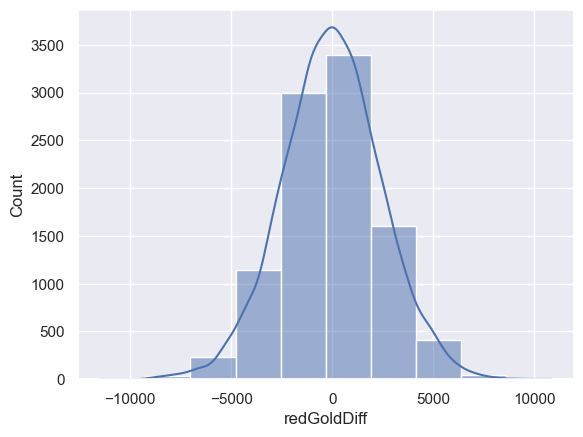

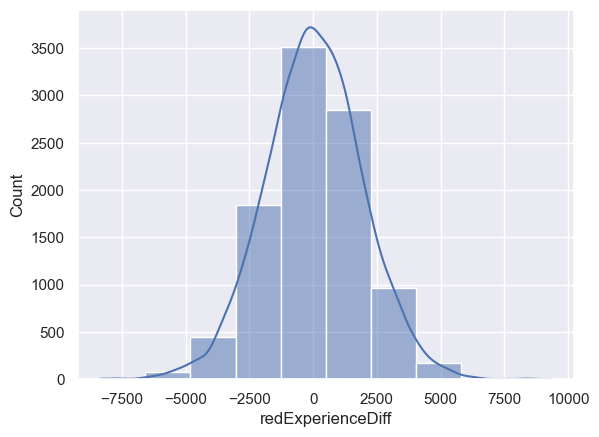

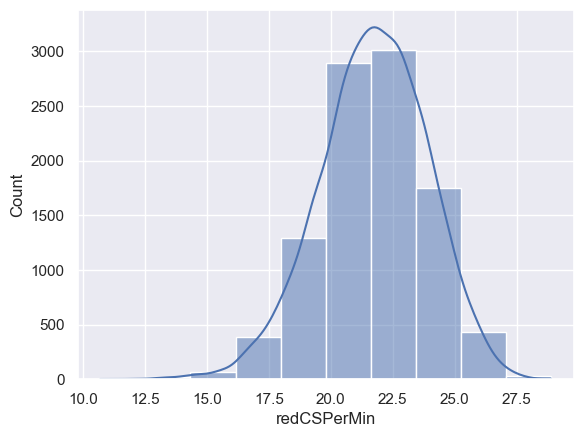

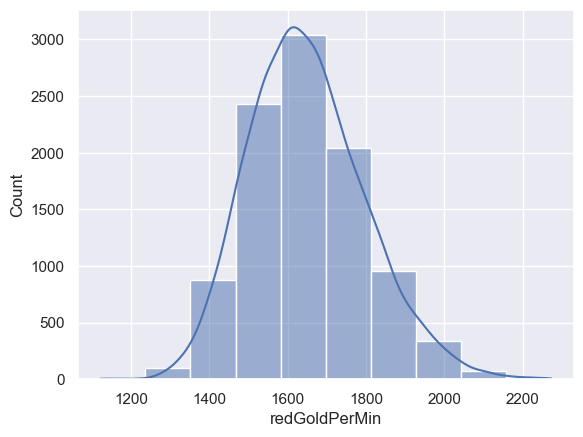

In [230]:
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
eda_num(df)

In [227]:
explore(df)

,dtypes,count,null_sum,null_pct,nunique,min,25%,50%,75%,max,mean,median,std,skew
gameId,int64,9879,0,0.0,9879,4.295358e+09,4.483301e+09,4.510920e+09,4.521733e+09,4.527991e+09,4.500084e+09,4.510920e+09,2.757328e+07,-1.459
blueWins,int64,9879,0,0.0,2,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,4.990000e-01,0.000000e+00,5.000000e-01,0.004
blueWardsPlaced,int64,9879,0,0.0,147,5.000000e+00,1.400000e+01,1.600000e+01,2.000000e+01,2.500000e+02,2.228800e+01,1.600000e+01,1.801900e+01,4.136
blueWardsDestroyed,int64,9879,0,0.0,27,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,2.700000e+01,2.825000e+00,3.000000e+00,2.175000e+00,2.846
blueFirstBlood,int64,9879,0,0.0,2,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.050000e-01,1.000000e+00,5.000000e-01,-0.019
blueKills,int64,9879,0,0.0,21,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01,6.184000e+00,6.000000e+00,3.011000e+00,0.539
blueDeaths,int64,9879,0,0.0,21,0.000000e+00,4.000000e+00,6.000000e+00,8.000000e+00,2.200000e+01,6.138000e+00,6.000000e+00,2.934000e+00,0.507
blueAssists,int64,9879,0,0.0,30,0.000000e+00,4.000000e+00,6.000000e+00,9.000000e+00,2.900000e+01,6.645000e+00,6.000000e+00,4.065000e+00,0.890
blueEliteMonsters,int64,9879,0,0.0,3,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,5.500000e-01,0.000000e+00,6.260000e-01,0.692
blueDragons,int64,9879,0,0.0,2,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.620000e-01,0.000000e+00,4.810000e-01,0.574


In [34]:
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


### Cálculo de coeficiente de correlación de Pearson para selección de features

In [248]:
# calcular la matriz de correlación
corr_matrix = df.corr()

# calcular la media de los coeficientes de correlación para cada columna
corr_mean = corr_matrix.mean()

# mostrar los resultados
print(corr_mean.to_string())

gameId                          0.018097
blueWins                        0.026289
blueWardsPlaced                 0.029579
blueWardsDestroyed              0.037327
blueFirstBlood                  0.005077
blueKills                       0.079145
blueDeaths                      0.062851
blueAssists                     0.069547
blueEliteMonsters               0.050076
blueDragons                     0.024697
blueHeralds                     0.049793
blueTowersDestroyed             0.044994
blueTotalGold                   0.099893
blueAvgLevel                    0.081408
blueTotalExperience             0.084745
blueTotalMinionsKilled          0.043472
blueTotalJungleMinionsKilled    0.037113
blueGoldDiff                    0.013983
blueExperienceDiff              0.013190
blueCSPerMin                    0.043472
blueGoldPerMin                  0.099893
redWardsPlaced                  0.028519
redWardsDestroyed               0.035729
redFirstBlood                  -0.005077
redKills        

Eliminación de columnas: 

- blueTowersDestroyed: Puesto que la victoria del equipo azul no dependía de que tanto el otro equipo les destruía torres decidimos que eliminar esta columna desbalanceada era una buena opción.

- gameId: Esta columna no aportaba nada al modelo creado.

- Las demás columnas se eliminaron debido a que poseían datos muy dispersos como se muestra en el análisis exploratorio, principalmente en los gráficos de caja y bigotes o porque el coeficiente de Pearson era muy bajo.

### Limpieza y manipulación de datos

In [250]:
columns_to_drop = ["gameId", "blueTowersDestroyed", "redWardsPlaced", "redTowersDestroyed", "redHeralds", 
                   "blueHeralds", "blueWardsPlaced", "blueFirstBlood", "blueDragons", "redFirstBlood", "redEliteMonsters",
                   "redDragons", "redExperienceDiff", "redGoldDiff"]
df = clean(df, method = 'dropcols', columns = columns_to_drop)

### Normalización de datos

In [251]:
# Crea el objeto StandardScaler
scaler = StandardScaler()
# Escala los datos
scaled_df = scaler.fit_transform(df)
# Crea un nuevo DataFrame con los datos escalados
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)

In [51]:
scaled_df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin,blueTowersDestroyed
0,-2.278873,0.164891,-0.240700,0.588741,-0.195937,0.517917,0.309165,-1.100541,-0.849535,-0.894419,...,0.927710,0.780704,0.663181,0.483169,0.934573,1.061299,1.092860,0.483169,0.927710,-1.414214
1,-2.278873,-0.503660,-0.759922,-1.698540,-1.216575,0.147538,-0.918430,-1.100541,-0.849535,-0.894419,...,1.452338,0.780704,0.794796,1.509509,0.677820,1.873114,1.431696,1.509509,1.452338,-1.414214
2,-2.278873,-0.378307,-1.279144,-1.698540,-0.706256,2.369814,-1.123029,0.173791,1.177114,-0.894419,...,1.285433,0.780704,0.732860,0.626379,-1.376208,1.476237,1.390977,0.626379,1.285433,-1.414214
3,-2.278873,0.791659,-0.759922,-1.698540,-1.471734,0.147538,-0.918430,0.173791,-0.849535,1.118045,...,0.883368,1.036824,0.970843,1.390167,0.249898,1.510300,1.092569,1.390167,0.883368,-1.414214
4,-2.278873,2.128762,0.797743,-1.698540,-0.961416,0.517917,-0.713831,-1.100541,-0.849535,-0.894419,...,1.344722,1.036824,1.089330,1.151483,1.961587,1.437829,1.023639,1.151483,1.344722,-1.414214


### Inicio del modelo

In [252]:
# Node class
class Node:
    __slots__ = ['feature', 'threshold', 'value', 'left', 'right']

    def __init__(self, feature=None, threshold=None, value=None, left=None, right=None):
        self.feature = feature
        self.threshold = threshold
        self.value = value
        self.left = left
        self.right = right
        
# Method to build the tree
def TreeConstruction(X, y, max_depth=3, depth=0):
    max_features = 4
    # If all elements in y are the same, return a leaf node with that value
    if len(y.unique()) == 1:
        return Node(value=y.iloc[0])
    
    # If maximum depth is reached, return a leaf node with the majority class
    if depth == max_depth:  
        return Node(value=y.value_counts().idxmax())
    
    # Select the best split variable and threshold to split the data
    best_feature, best_threshold = select_best_split(X, y, max_features)
    
    # Divide the data into two sets - those that satisfy the condition and those that don't
    left_idx = X[best_feature] < best_threshold
    right_idx = ~left_idx
    
    # Build the sub-trees
    left = TreeConstruction(X.loc[left_idx], y.loc[left_idx], max_depth, depth+1)
    right = TreeConstruction(X.loc[right_idx], y.loc[right_idx], max_depth, depth+1)
    
    # Return the root node of the sub-tree
    return Node(feature=best_feature, threshold=best_threshold, left=left, right=right)

def select_best_split(X, y, max_features=None):
    n_features = X.shape[1]
    if max_features is not None and max_features < n_features:
        features = np.random.choice(X.columns, size=max_features, replace=False)
    else:
        features = X.columns
    
    best_feature, best_threshold, best_gini = None, None, 1.0
    
    for feature in features:
        if X[feature].dtype == 'O':
            # Categorical feature
            for threshold in X[feature].unique():
                left_idx = X[feature] == threshold
                right_idx = X[feature] != threshold
                left_gini = gini(y.loc[left_idx])
                right_gini = gini(y.loc[right_idx])
                gini_impurity = (left_gini * sum(left_idx) + right_gini * sum(right_idx)) / len(y)
                
                if gini_impurity < best_gini:
                    best_feature = feature
                    best_threshold = threshold
                    best_gini = gini_impurity
        else:
            # Continuous feature
            median = X[feature].median()
            left_idx = X[feature] < median
            right_idx = X[feature] >= median
            left_gini = gini(y.loc[left_idx])
            right_gini = gini(y.loc[right_idx])
            gini_impurity = (left_gini * sum(left_idx) + right_gini * sum(right_idx)) / len(y)
            
            if gini_impurity < best_gini:
                best_feature = feature
                best_threshold = median
                best_gini = gini_impurity
                
    return best_feature, best_threshold

def gini(y):
    # Calculate the proportion of each class in y
    _, counts = np.unique(y, return_counts=True)
    p = counts / len(y)

    # Calculate the Gini impurity
    gini = 1 - np.sum(p**2)

    return gini

def predict(x, tree):
    # If we reach a leaf node, return the corresponding class
    if tree.value is not None:
        return tree.value

    # If the instance satisfies the condition of the node, continue down the left subtree
    if x[tree.feature] < tree.threshold:
        return predict(x, tree.left)

    # Otherwise, continue down the right subtree
    else:
        return predict(x, tree.right)

### Predicciones y evaluación del modelo

In [253]:
from sklearn.metrics import accuracy_score

# Seleccionar todas las columnas menos 'blueWins' para las características (features)
X = scaled_df.drop(['blueWins'], axis=1)
# Seleccionar la columna 'blueWins' para la variable objetivo (target)
y = scaled_df['blueWins']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf = TreeConstruction(X_train, y_train, max_depth=4)

y_pred = []

for i in range(len(X_test)):
    # Hacer una llamada a la función predict para predecir la clase de la instancia actual
    prediction = predict(X_test.iloc[i], clf)
    y_pred.append(prediction)

threshold = 0.5
y_test_bin = [1 if y >= threshold else 0 for y in y_test]
y_pred_bin = [1 if y >= threshold else 0 for y in y_pred]

accuracy = accuracy_score(y_test_bin, y_pred_bin)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.6988866396761133


### Utilización de cross validation para manejar overfitting

In [254]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint

# Leer archivo csv
df = pd.read_csv('./Datasets/high_diamond_ranked_10min.csv')

# Seleccionar todas las columnas menos 'blueWins' para las características (features)
X = df.drop(['blueWins'], axis=1)
# Seleccionar la columna 'blueWins' para la variable objetivo (target)
y = df['blueWins']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=4, n_jobs=4)
    depth.append((i,scores.mean()))

# Ordenar la lista en orden descendente por el segundo elemento de cada tupla
sorted_list = sorted(depth, key=lambda x: x[1], reverse=True)

# Tomar la primera tupla resultante
result = sorted_list[0]

print("Mejor profundidad del árbol:", result[0], " y precisión del modelo:", result[1]) 

Mejor profundidad del árbol: 4  y precisión del modelo: 0.7227450343777004


## Comparación con librerías

### Utilización de gridSearch para encontrar los mejores parámetros

In [255]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import cross_val_score
from pprint import pprint
from sklearn.model_selection import GridSearchCV

# Leer archivo csv
df = pd.read_csv('./Datasets/high_diamond_ranked_10min.csv')

# Seleccionar todas las columnas menos 'blueWins' para las características (features)
x = df.drop(['blueWins'], axis=1)
# Seleccionar la columna 'blueWins' para la variable objetivo (target)
y = df['blueWins']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

parameters = {'max_depth':range(3,20)}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
clf.fit(X=x, y=y)
tree_model = clf.best_estimator_

print("Mejor profundidad del árbol:", clf.best_params_['max_depth'], " y precisión del modelo:", clf.best_score_) 

Mejor profundidad del árbol: 4  y precisión del modelo: 0.7229471634295085


### Utilización de DecisionTreeClassifier para evaluar el modelo

In [256]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Leer archivo csv
df = pd.read_csv('./Datasets/high_diamond_ranked_10min.csv')

# Seleccionar todas las columnas menos 'blueWins' para las características (features)
X = df.drop(['blueWins'], axis=1)
# Seleccionar la columna 'blueWins' para la variable objetivo (target)
y = df['blueWins']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Crear el modelo de Árbol de Decisión
dt = DecisionTreeClassifier(random_state=0, max_depth=5)

# Entrenar el modelo con los datos de entrenamiento
dt.fit(X_train, y_train)

# Predecir los valores de 'blueWins' para los datos de prueba
y_pred = dt.predict(X_test)

# Evaluar la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

Precisión del modelo: 0.7130566801619433


- ¿Qué métrica usaron para seleccionar los features?
    - Se utiliza el coeficiente de correlación de Pearson y los gráficos de caja y bigotes para determinar que variables aportaban menos valor al modelo.

- Los features más importantes son:
    - Blue Wins
    - Blue kills
    - Red Deaths
    - Blue Total Experience
    - Blue Total Minions Killed

- Para manejar el overfitting, ya que se normalizaron algunos datos y se buscó el balanceo de datos, se trabajó con cross-validation.

- En cuanto al tunning de variables, esto se trabajó principalmente en la evaluación de los modelos, dónde se modificó la profundidad del árbol y la cantidad de intentos para buscar el mejor split de los datos al momento de construir el árbol, para el cross_validation se modificaron datos como el número de trabajos a realizar y la cantidad de "folds" que se realizarían.

### Task 1.2 - Predicción de Potencial en personajes de FIFA 2018

In [2]:
# Leer archivo csv
df = pd.read_csv('./Datasets/CompleteDataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17981 entries, 0 to 17980
Data columns (total 75 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           17981 non-null  int64  
 1   Name                 17981 non-null  object 
 2   Age                  17981 non-null  int64  
 3   Photo                17981 non-null  object 
 4   Nationality          17981 non-null  object 
 5   Flag                 17981 non-null  object 
 6   Overall              17981 non-null  int64  
 7   Potential            17981 non-null  int64  
 8   Club                 17733 non-null  object 
 9   Club Logo            17981 non-null  object 
 10  Value                17981 non-null  object 
 11  Wage                 17981 non-null  object 
 12  Special              17981 non-null  int64  
 13  Acceleration         17981 non-null  object 
 14  Aggression           17981 non-null  object 
 15  Agility              17981 non-null 

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18548\3452328285.py:2: DtypeWarning:

Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.

